## Importing the Libraries

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from random import randint
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Build the ANN class

In [23]:
class PyTorch_MNIST:
  
  def __init__(self, hidden_layers = [28, 64], hidden_layers_types = ['relu', 'sigmoid'], optimizer_name = 'SGD', learning_rate = 0.05, momentum = 0.5, epochs = 10):
 
    #Declare the variables 
    self.inputSize = 784
    self.outputSize = 10
 
    self.hidden_layers = hidden_layers
    self.hidden_layers_types = hidden_layers_types
 
    self.optimizer = optimizer_name
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.momentum = momentum
 
    self.correct_predicts = 0
    self.incorrect_predicts = 0
    
    #Perform the needed transforms
    self.transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    # Download the dataset
    self.trainset = datasets.MNIST('sample_data/', train = True, transform = self.transform, download = True)
    self.testset = datasets.MNIST('sample_data/', train = False, transform = self.transform, download = True)
 
    self.trainsetLoader = torch.utils.data.DataLoader(self.trainset, batch_size = 64, shuffle = True)
    self.testsetLoader = torch.utils.data.DataLoader(self.testset, batch_size = 10000, shuffle = False)
 
    #Set the configuration of the model
    self.model_configuration = []
    self.model_configuration.append(nn.Linear(self.inputSize, self.hidden_layers[0]))
    self.model_configuration.append(nn.ReLU()) if self.hidden_layers_types[0] == 'relu' else self.model_configuration.append(nn.Sigmoid())
    for i in range(1, len(self.hidden_layers)):
      self.model_configuration.append(nn.Linear(self.hidden_layers[i - 1], self.hidden_layers[i]))
      self.model_configuration.append(nn.ReLU()) if self.hidden_layers_types[i] == 'relu' else self.model_configuration.append(nn.Sigmoid())
    self.model_configuration.append(nn.Linear(self.hidden_layers[-1], self.outputSize))
    self.model_configuration.append(nn.LogSoftmax(dim = 1))
    self.model = nn.Sequential(*self.model_configuration)
 
    #create the Loss class
    self.creterion = nn.NLLLoss()
    
    #Train the model
    self.train()
 
    #Create a random int number for testing 
    self.random_index = randint(0, 9999)
 
    #Test the model
    self.test(self.random_index)
 
    #Show the random test image
    self.show_the_test_image(self.random_index)
 
    #Calculate the accuracy 
    self.calculate_accuracy()
 
  def train(self):
    if self.optimizer == 'SGD':
      self.optim = optim.SGD(self.model.parameters(), self.learning_rate, self.momentum) 
    else:
      self.optim = optim.Adam(self.model.parameters(), self.learning_rate, self.momentum)
 
    self.time = time()
    for i in range(self.epochs):
      self.running_loss = 0
      for images, labels in self.trainsetLoader:
        images = images.view(images.shape[0], -1)
        self.optim.zero_grad()
        self.output = self.model(images)
        self.loss = self.creterion(self.output, labels)
        self.loss.backward()
        self.optim.step()
        self.running_loss += self.loss.item()
 
      print("Epoch {} - Training loss: {}".format(i, self.running_loss/len(self.trainsetLoader)))
    
    print("\nTraining Time (in minutes) =",(time() - self.time)/60)
 
  def show_the_test_image(self, random_index):
    images, labels = next(iter(self.testsetLoader))
    image = images[random_index].view(28, 28)
    print('\n') 
    plt.imshow(image)
    plt.show()
 
  def test(self, random_image_number):
    images, labels = next(iter(self.testsetLoader))
    random_image = images[random_image_number].view(1, 784)
    actual_label = labels.numpy()[random_image_number]
      
    with torch.no_grad():
      output = self.model(random_image)
 
    ps = torch.exp(output)
    probab = list(ps.numpy()[0])
    print("\nPredicted Digit =", probab.index(max(probab)))
    print('Actual Label', actual_label)
 
 
  def calculate_accuracy(self):
    self.testsetLoader = torch.utils.data.DataLoader(self.testset, batch_size = 1, shuffle = True)
    for images, labels in self.testsetLoader:
      for i in range(len(labels)):
        images, labels = next(iter(self.testsetLoader))
        image = images[i].view(1, 784)
        with torch.no_grad():
          output = self.model(image)
      
      ps = torch.exp(output)
      probab = list(ps.numpy()[0])
      predicted_label = probab.index(max(probab))
      actual_label = labels.numpy()[i]
      if predicted_label == actual_label:
        self.correct_predicts += 1
      else: 
        self.incorrect_predicts += 1
      
    print('\nTest size: ', len(self.testsetLoader))
    print('The number of correct predictios: ', self.correct_predicts)
    print('The number of incorrect predictios: ', self.incorrect_predicts)
    print('The accuracy of the model: %{:.2f}'.format((self.correct_predicts / len(self.testsetLoader)) * 100))

Epoch 0 - Training loss: 2.3005972086493647
Epoch 1 - Training loss: 2.294564301271174
Epoch 2 - Training loss: 1.906581366621355
Epoch 3 - Training loss: 1.053109817731101
Epoch 4 - Training loss: 0.7540379752800155
Epoch 5 - Training loss: 0.63162827993761
Epoch 6 - Training loss: 0.5152239643498016
Epoch 7 - Training loss: 0.42782585235483356
Epoch 8 - Training loss: 0.36930861256555964
Epoch 9 - Training loss: 0.3230726849327464

Training Time (in minutes) = 3.022190280755361

Predicted Digit = 1
Actual Label 1




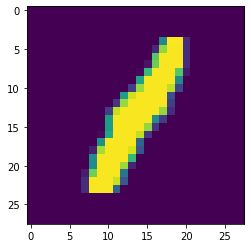


Test size:  10000
The number of correct predictios:  9121
The number of incorrect predictios:  879
The accuracy of the model: %91.21


In [24]:
cl = PyTorch_MNIST(hidden_layers = [700, 200, 128, 64], hidden_layers_types = ['sigmoid', 'relu', 'sigmoid', 'relu'],
                   momentum = 0.05, learning_rate=0.03)